## 3 tests mimicking more real-world difficult conditions.
- Method of random erasing to simulate situations where part of the face is covered.
- Random significant brightness reduction to check how the model behaves in lower lightning conditions.
- Analogously random significant brightness increase
- Additionaly a [video](https://pixabay.com/videos/park-old-people-people-old-senior-6096/) where faces are in a dsitance and sometimes covered has been run through the model

# Maybe reduce the dataset size, cause it will prob take a long time to do it on the whole UTK Face dataset

1. augument data in a certain way, run it through the model, for each compare the result, try to get the MRSE and MAPE.
2. Show a couple of results, like 2 of them.
3. Repeat for all the scenarios

In [23]:
import cv2
import glob
import os
from matplotlib import pyplot as plt
from random import randrange
import numpy as np

In [33]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [3]:
UTKFACE_DIR = "C:/Users/prusak.patryk/Documents/studia/ItML/Project/UTKFace"

In [4]:

files = glob.glob(os.path.join(UTKFACE_DIR, "*.jpg"))

### Change of brightness

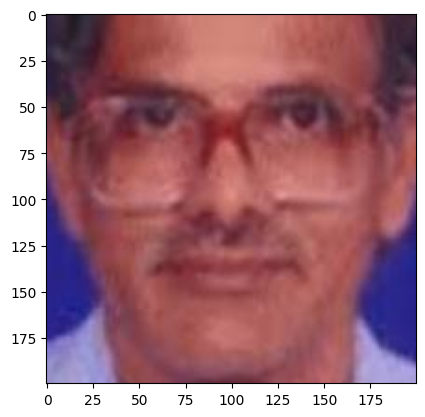

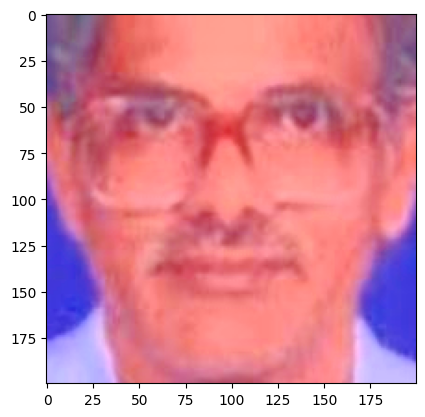

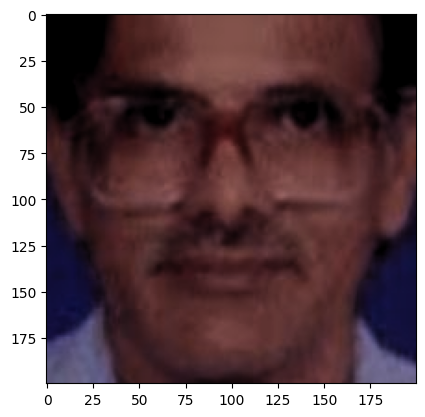

In [36]:
img = cv2.imread(files[20000])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
frame = change_brightness(img, value=randrange(50,150,2))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

img = cv2.imread(files[20000])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
frame = change_brightness(img, value=-randrange(50,150,2))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:

for img_path in files:
    try:
        img = cv2.imread(img_path)
        frame = increase_brightness(frame, value=randrange(20,50,2))
        # Run the model on the frame here and save the result
    except Exception as e:
        print("Couldn't parse the file: " + img_path)

for img_path in files:
    try:
        img = cv2.imread(img_path)
        frame = increase_brightness(frame, value=-randrange(20,50,2))
        # Run the model on the frame here and save the result
    except Exception as e:
        print("Couldn't parse the file: " + img_path)

### Random erasing

In [20]:


def get_random_eraser(p=1, s_l=0.1, s_h=0.5, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w] = c

        return input_img

    return eraser

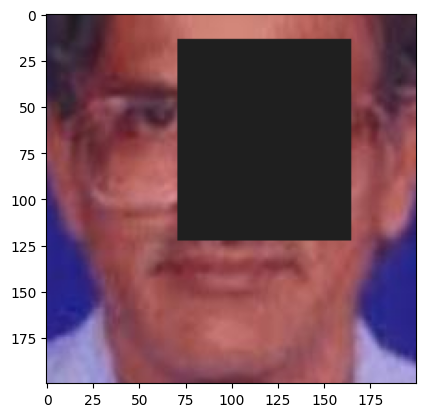

In [38]:

eraser = get_random_eraser()

img = cv2.imread(files[20000])
# load image to img
img = eraser(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()